 # Religious Texts: NLP Series
 ## Sentiment Analysis of the Islamic religious text, Quran

In [17]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prabhjyoth.mattummal\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prabhjyoth.mattummal\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
QURAN = pd.read_excel('C:/Programming Practice Notebooks/religious-texts-NLP/data/quran.xlsx')
QURAN

,Unnamed: 0,Juz,JuzNameArabic,JuzNameEnglish,SurahNo,SurahNameArabic,SurahNameEnglish,SurahMeaning,Classification,AyahNo,...,MalayalamText,NorwegianText,PersianText,PortugueseText,RussianText,SwedishText,TamilText,TurkishText,UrduText,UzbekText
0,0,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,1,...,പരമകാരുണികനും കരുണാനിധിയുമായ അല്ലാഹുവിന്റെ നാമ...,"I Guds, den Barmhjertiges, den Nåderikes navn",به نام خداوند بخشنده بخشایشگر,"Em nome de Deus, o Clemente, o Misericordioso.","Во имя Аллаха, Милостивого, Милосердного!","I GUDs namn, Den Barmhärtigaste, Den Nådigaste.","அனைத்துப்புகழும்,அகிலங்கள் எல்லாவற்றையும் படைத...",Rahman ve Rahîm Allah´ın adıyla...,شروع الله کا نام لے کر جو بڑا مہربان نہایت رحم...,Меҳрибон ва раҳмли Аллоҳнинг номи билан бошлай...
1,1,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,2,...,സ്തുതി സര്‍വ്വലോക പരിപാലകനായ അല്ലാഹുവിന്നാകുന്നു.,"Lovet være Gud, all verdens Herre,",ستایش مخصوص خداوندی است که پروردگار جهانیان است.,"Louvado seja Deus, Senhor do Universo,","Хвала Аллаху, Господу миров,","Prisad vare GUD, Universums Herre.","(அவன்) அளவற்ற அருளாளன், நிகரற்ற அன்புடையோன்.","Hamt, âlemlerin Rabbi Allah´adır.",سب طرح کی تعریف خدا ہی کو (سزاوار) ہے جو تمام ...,"Барча мақтов, шукрлар оламларнинг тарбиячиси А..."
2,2,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,3,...,പരമകാരുണികനും കരുണാനിധിയും.,"Han, den Barmhjertige, den Nåderike,",(خداوندی که) بخشنده و بخشایشگر است (و رحمت عام...,"Clemente, o Misericordioso,","Милостивому, Милосердному,","Den Barmhärtigaste, Den Nådigaste.",(அவனே நியாயத்) தீர்ப்பு நாளின் அதிபதி(யும் ஆவா...,"Rahman´dır, Rahîm´dir O.",بڑا مہربان نہایت رحم والا,"У Роҳман ва Раҳийм... (Барчага-кофирга ҳам, мў..."
3,3,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,4,...,പ്രതിഫല ദിവസത്തിന്റെ ഉടമസ്ഥന്‍.,"Han, Herren over dommens dag.",(خداوندی که) مالک روز جزاست.,Soberano do Dia do Ju�zo.,Властелину Дня воздаяния!,Domedagens Härskare.,"(இறைவா!) உன்னையே நாங்கள் வணங்குகிறோம், உன்னிடம...",Din gününün Mâlik´i/ sultanıdır O...,انصاف کے دن کا حاکم,"У қиёмат кунининг подшоҳи, эгаси. (""Дин"" сўзи ..."
4,4,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,5,...,നിന്നെ മാത്രം ഞങ്ങള്‍ ആരാധിക്കുന്നു. നിന്നോട്‌...,"Deg tilber vi, vi søker hjelp hos Deg.",(پروردگارا!) تنها تو را می‌پرستیم؛ و تنها از ت...,S� a Ti adoramos e s� de Ti imploramos ajuda!,Тебе одному мы поклоняемся и Тебя одного молим...,Endast Dig dyrkar vi. Endast Dig ber vi om hjälp.,நீ எங்களை நேர் வழியில் நடத்துவாயாக!,Yalnız sana ibadet ederiz ve yalnız senden yar...,(اے پروردگار) ہم تیری ہی عبادت کرتے ہیں اور تج...,Фақат сенгагина ибодат қиламиз ва фақат сендан...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,6231,30,عَمَّ يَتَسَاءَلُونَ,Amma Yatasa'aloon,114,الناس,An-Nas,Mankind,Makki,2,...,മനുഷ്യരുടെ രാജാവിനോട്‌.,"menneskenes Konge,",به مالک و حاکم مردم،,"O Rei dos humanos,",NaN,NaN,NaN,NaN,(یعنی) لوگوں کے حقیقی بادشاہ کی,Одамлар Подшоҳидан.
6232,6232,30,عَمَّ يَتَسَاءَلُونَ,Amma Yatasa'aloon,114,الناس,An-Nas,Mankind,Makki,3,...,മനുഷ്യരുടെ ദൈവത്തോട്‌.,"menneskenes Gud,",به (خدا و) معبود مردم،,"O Deus dos humanos,",NaN,NaN,NaN,NaN,لوگوں کے معبود برحق کی,Одамлар Илоҳидан паноҳ сўрайман.
6233,6233,30,عَمَّ يَتَسَاءَلُونَ,Amma Yatasa'aloon,114,الناس,An-Nas,Mankind,Makki,4,...,ദുര്‍ബോധനം നടത്തി പിന്‍മാറിക്കളയുന്നവരെക്കൊണ്ട...,"mot ondt fra den smygende frister,",از شرّ وسوسه‌گر پنهانکار،,"Contra o mal do sussurro do malfeitor,",NaN,NaN,NaN,NaN,(شیطان) وسوسہ انداز کی برائی سے جو (خدا کا نام...,"Беркиниб, кўриниб турувчи васвоснинг."
6234,6234,30,عَمَّ يَتَسَاءَلُونَ,Amma Yatasa'aloon,114,الناس,An-Nas,Mankind,Makki,5,...,മനുഷ്യരുടെ ഹൃദയങ്ങളില്‍ ദുര്‍ബോധനം നടത്തുന്നവര്‍.,"som hvisker i menneskenes hjerter,",که در درون سینه انسانها وسوسه می‌کند،,"Que sussurra aos cora��es dos humanos,",NaN,NaN,NaN,NaN,جو لوگوں کے دلوں میں وسوسے ڈالتا ہے,Одамлар қалбига васваса соладиганнинг.


In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
from tqdm import tqdm

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prabhjyoth.mattummal\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
analyser = SentimentIntensityAnalyzer()

def predict_with_VaderSentiment(text):
    snt = analyser.polarity_scores(text)  #Calling the polarity analyzer
    if snt["compound"] >= 0:
        snt = "POSITIVE"
    else: snt="NEGATIVE"
    return snt


# Testing the operation of the model
text = "the most hated"
predict_with_VaderSentiment(text)

'NEGATIVE'

In [20]:
tqdm.pandas()
QURAN['Sentiment Analysis'] = QURAN['EnglishTranslation'].progress_apply(predict_with_VaderSentiment)
QURAN

100%|██████████| 6236/6236 [00:01<00:00, 4666.04it/s]


,Unnamed: 0,Juz,JuzNameArabic,JuzNameEnglish,SurahNo,SurahNameArabic,SurahNameEnglish,SurahMeaning,Classification,AyahNo,...,NorwegianText,PersianText,PortugueseText,RussianText,SwedishText,TamilText,TurkishText,UrduText,UzbekText,Sentiment Analysis
0,0,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,1,...,"I Guds, den Barmhjertiges, den Nåderikes navn",به نام خداوند بخشنده بخشایشگر,"Em nome de Deus, o Clemente, o Misericordioso.","Во имя Аллаха, Милостивого, Милосердного!","I GUDs namn, Den Barmhärtigaste, Den Nådigaste.","அனைத்துப்புகழும்,அகிலங்கள் எல்லாவற்றையும் படைத...",Rahman ve Rahîm Allah´ın adıyla...,شروع الله کا نام لے کر جو بڑا مہربان نہایت رحم...,Меҳрибон ва раҳмли Аллоҳнинг номи билан бошлай...,POSITIVE
1,1,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,2,...,"Lovet være Gud, all verdens Herre,",ستایش مخصوص خداوندی است که پروردگار جهانیان است.,"Louvado seja Deus, Senhor do Universo,","Хвала Аллаху, Господу миров,","Prisad vare GUD, Universums Herre.","(அவன்) அளவற்ற அருளாளன், நிகரற்ற அன்புடையோன்.","Hamt, âlemlerin Rabbi Allah´adır.",سب طرح کی تعریف خدا ہی کو (سزاوار) ہے جو تمام ...,"Барча мақтов, шукрлар оламларнинг тарбиячиси А...",POSITIVE
2,2,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,3,...,"Han, den Barmhjertige, den Nåderike,",(خداوندی که) بخشنده و بخشایشگر است (و رحمت عام...,"Clemente, o Misericordioso,","Милостивому, Милосердному,","Den Barmhärtigaste, Den Nådigaste.",(அவனே நியாயத்) தீர்ப்பு நாளின் அதிபதி(யும் ஆவா...,"Rahman´dır, Rahîm´dir O.",بڑا مہربان نہایت رحم والا,"У Роҳман ва Раҳийм... (Барчага-кофирга ҳам, мў...",POSITIVE
3,3,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,4,...,"Han, Herren over dommens dag.",(خداوندی که) مالک روز جزاست.,Soberano do Dia do Ju�zo.,Властелину Дня воздаяния!,Domedagens Härskare.,"(இறைவா!) உன்னையே நாங்கள் வணங்குகிறோம், உன்னிடம...",Din gününün Mâlik´i/ sultanıdır O...,انصاف کے دن کا حاکم,"У қиёмат кунининг подшоҳи, эгаси. (""Дин"" сўзи ...",POSITIVE
4,4,1,الم,Alif Lam Meem,1,الفاتحة,Al-Fatiha,The Opening,Makki,5,...,"Deg tilber vi, vi søker hjelp hos Deg.",(پروردگارا!) تنها تو را می‌پرستیم؛ و تنها از ت...,S� a Ti adoramos e s� de Ti imploramos ajuda!,Тебе одному мы поклоняемся и Тебя одного молим...,Endast Dig dyrkar vi. Endast Dig ber vi om hjälp.,நீ எங்களை நேர் வழியில் நடத்துவாயாக!,Yalnız sana ibadet ederiz ve yalnız senden yar...,(اے پروردگار) ہم تیری ہی عبادت کرتے ہیں اور تج...,Фақат сенгагина ибодат қиламиз ва фақат сендан...,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,6231,30,عَمَّ يَتَسَاءَلُونَ,Amma Yatasa'aloon,114,الناس,An-Nas,Mankind,Makki,2,...,"menneskenes Konge,",به مالک و حاکم مردم،,"O Rei dos humanos,",NaN,NaN,NaN,NaN,(یعنی) لوگوں کے حقیقی بادشاہ کی,Одамлар Подшоҳидан.,POSITIVE
6232,6232,30,عَمَّ يَتَسَاءَلُونَ,Amma Yatasa'aloon,114,الناس,An-Nas,Mankind,Makki,3,...,"menneskenes Gud,",به (خدا و) معبود مردم،,"O Deus dos humanos,",NaN,NaN,NaN,NaN,لوگوں کے معبود برحق کی,Одамлар Илоҳидан паноҳ сўрайман.,POSITIVE
6233,6233,30,عَمَّ يَتَسَاءَلُونَ,Amma Yatasa'aloon,114,الناس,An-Nas,Mankind,Makki,4,...,"mot ondt fra den smygende frister,",از شرّ وسوسه‌گر پنهانکار،,"Contra o mal do sussurro do malfeitor,",NaN,NaN,NaN,NaN,(شیطان) وسوسہ انداز کی برائی سے جو (خدا کا نام...,"Беркиниб, кўриниб турувчи васвоснинг.",NEGATIVE
6234,6234,30,عَمَّ يَتَسَاءَلُونَ,Amma Yatasa'aloon,114,الناس,An-Nas,Mankind,Makki,5,...,"som hvisker i menneskenes hjerter,",که در درون سینه انسانها وسوسه می‌کند،,"Que sussurra aos cora��es dos humanos,",NaN,NaN,NaN,NaN,جو لوگوں کے دلوں میں وسوسے ڈالتا ہے,Одамлар қалбига васваса соладиганнинг.,POSITIVE


In [66]:
counts = QURAN['Sentiment Analysis'].value_counts()
counts

POSITIVE    4119
NEGATIVE    2117
Name: Sentiment Analysis, dtype: int64

In [69]:
df = QURAN[['JuzNameArabic', 'SurahNo', 'OrignalArabicText','EnglishTranslation', 'UrduText' , 'MalayalamText' ,'Sentiment Analysis']]
df.to_csv("C:/Programming Practice Notebooks/religious-texts-NLP/result/quran+english_sentiment_analysis.csv", encoding="utf-8-sig", index=False)

### Negative sentiment

In [70]:
neg = df.loc[df['Sentiment Analysis'] == 'NEGATIVE']
neg

,JuzNameArabic,SurahNo,OrignalArabicText,EnglishTranslation,UrduText,MalayalamText,Sentiment Analysis
12,الم,2,إِنَّ الَّذِينَ كَفَرُوا سَوَاءٌ عَلَيْهِمْ أَ...,"As to those who reject Faith, it is the same t...",جو لوگ کافر ہیں انہیں تم نصیحت کرو یا نہ کرو ا...,സത്യനിഷേധികളെ സംബന്ധിച്ചിടത്തോളം നീ അവര്‍ക്ക്‌...,NEGATIVE
15,الم,2,يُخَادِعُونَ اللَّهَ وَالَّذِينَ آمَنُوا وَمَا...,Fain would they deceive Allah and those who be...,یہ (اپنے پندار میں) خدا کو اور مومنوں کو چکما ...,അല്ലാഹുവിനെയും വിശ്വാസികളെയും വഞ്ചിക്കുവാനാണ്‌...,NEGATIVE
16,الم,2,فِي قُلُوبِهِمْ مَرَضٌ فَزَادَهُمُ اللَّهُ مَر...,In their hearts is a disease; and Allah has in...,ان کے دلوں میں (کفر کا) مرض تھا۔ خدا نے ان کا ...,അവരുടെ മനസ്സുകളില്‍ ഒരുതരം രോഗമുണ്ട്‌. തന്നിമി...,NEGATIVE
18,الم,2,أَلَا إِنَّهُمْ هُمُ الْمُفْسِدُونَ وَلَٰكِنْ ...,"Of a surety, they are the ones who make mischi...",دیکھو یہ بلاشبہ مفسد ہیں، لیکن خبر نہیں رکھتے,എന്നാല്‍ യഥാര്‍ത്ഥത്തില്‍ അവര്‍ തന്നെയാകുന്നു ...,NEGATIVE
19,الم,2,وَإِذَا قِيلَ لَهُمْ آمِنُوا كَمَا آمَنَ النَّ...,"When it is said to them: ""Believe as the other...",اور جب ان سے کہا جاتا ہے کہ جس طرح اور لوگ ایم...,മറ്റുള്ളവര്‍ വിശ്വസിച്ചത്‌ പോലെ നിങ്ങളും വിശ്വ...,NEGATIVE
...,...,...,...,...,...,...,...
6226,عَمَّ يَتَسَاءَلُونَ,113,مِنْ شَرِّ مَا خَلَقَ,From the mischief of created things;,ہر چیز کی بدی سے جو اس نے پیدا کی,അവന്‍ സൃഷ്ടിച്ചുട്ടുള്ളവയുടെ കെടുതിയില്‍ നിന്ന്‌.,NEGATIVE
6227,عَمَّ يَتَسَاءَلُونَ,113,وَمِنْ شَرِّ غَاسِقٍ إِذَا وَقَبَ,From the mischief of Darkness as it overspreads;,اور شب تاریکی کی برائی سے جب اس کااندھیرا چھا ...,ഇരുളടയുമ്പോഴുള്ള രാത്രിയുടെ കെടുതിയില്‍നിന്നും.,NEGATIVE
6228,عَمَّ يَتَسَاءَلُونَ,113,وَمِنْ شَرِّ النَّفَّاثَاتِ فِي الْعُقَدِ,From the mischief of those who practise secret...,اور گنڈوں پر (پڑھ پڑھ کر) پھونکنے والیوں کی بر...,കെട്ടുകളില്‍ ഊതുന്ന സ്ത്രീകളുടെ കെടുതിയില്‍നിന...,NEGATIVE
6229,عَمَّ يَتَسَاءَلُونَ,113,وَمِنْ شَرِّ حَاسِدٍ إِذَا حَسَدَ,And from the mischief of the envious one as he...,اور حسد کرنے والے کی برائی سے جب حسد کرنے لگے,അസൂയാലു അസൂയപ്പെടുമ്പോള്‍ അവന്‍റെ കെടുതിയില്‍ന...,NEGATIVE


(-0.5, 1999.5, 999.5, -0.5)

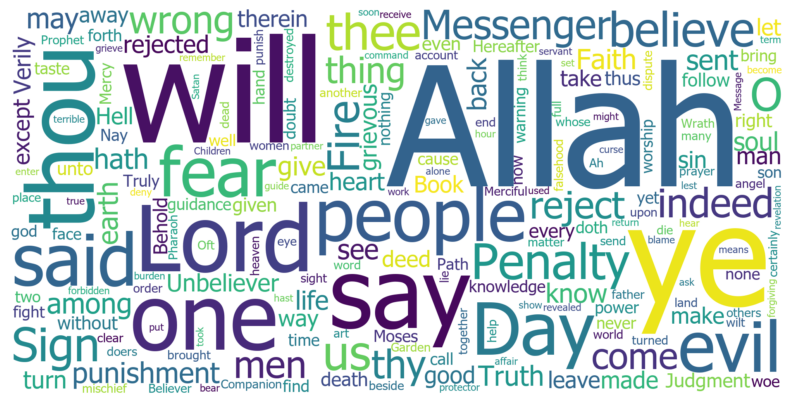

In [59]:
#Creating word cloud for the negative words (English)

from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(collocations=False,background_color="white", font_path='tahoma',width=2000,height=1000)
wc.generate(' '.join(neg.EnglishTranslation))
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [45]:
#Creating word cloud for the negative words (Arabic)

# !pip install python-bidi
# !pip install --upgrade arabic-reshaper

from bidi.algorithm import get_display
import os
import arabic_reshaper
from wordcloud import WordCloud, ImageColorGenerator



In [50]:
## Arabic texts to a list of words

neg_arabic =  list(neg['OrignalArabicText'])
full_string = ' '.join(neg_arabic)
reshaped_text = arabic_reshaper.reshape(full_string)
artext = get_display(reshaped_text)
artext

['إِنَّ الَّذِينَ كَفَرُوا سَوَاءٌ عَلَيْهِمْ أَأَنْذَرْتَهُمْ أَمْ لَمْ تُنْذِرْهُمْ لَا يُؤْمِنُونَ', 'يُخَادِعُونَ اللَّهَ وَالَّذِينَ آمَنُوا وَمَا يَخْدَعُونَ إِلَّا أَنْفُسَهُمْ وَمَا يَشْعُرُونَ', 'فِي قُلُوبِهِمْ مَرَضٌ فَزَادَهُمُ اللَّهُ مَرَضًا ۖ وَلَهُمْ عَذَابٌ أَلِيمٌ بِمَا كَانُوا يَكْذِبُونَ', 'أَلَا إِنَّهُمْ هُمُ الْمُفْسِدُونَ وَلَٰكِنْ لَا يَشْعُرُونَ', 'وَإِذَا قِيلَ لَهُمْ آمِنُوا كَمَا آمَنَ النَّاسُ قَالُوا أَنُؤْمِنُ كَمَا آمَنَ السُّفَهَاءُ ۗ أَلَا إِنَّهُمْ هُمُ السُّفَهَاءُ وَلَٰكِنْ لَا يَعْلَمُونَ', 'وَإِذَا لَقُوا الَّذِينَ آمَنُوا قَالُوا آمَنَّا وَإِذَا خَلَوْا إِلَىٰ شَيَاطِينِهِمْ قَالُوا إِنَّا مَعَكُمْ إِنَّمَا نَحْنُ مُسْتَهْزِئُونَ', 'اللَّهُ يَسْتَهْزِئُ بِهِمْ وَيَمُدُّهُمْ فِي طُغْيَانِهِمْ يَعْمَهُونَ', 'أُولَٰئِكَ الَّذِينَ اشْتَرَوُا الضَّلَالَةَ بِالْهُدَىٰ فَمَا رَبِحَتْ تِجَارَتُهُمْ وَمَا كَانُوا مُهْتَدِينَ', 'مَثَلُهُمْ كَمَثَلِ الَّذِي اسْتَوْقَدَ نَارًا فَلَمَّا أَضَاءَتْ مَا حَوْلَهُ ذَهَبَ اللَّهُ بِنُورِهِمْ وَتَرَكَهُمْ فِي ظُلُم

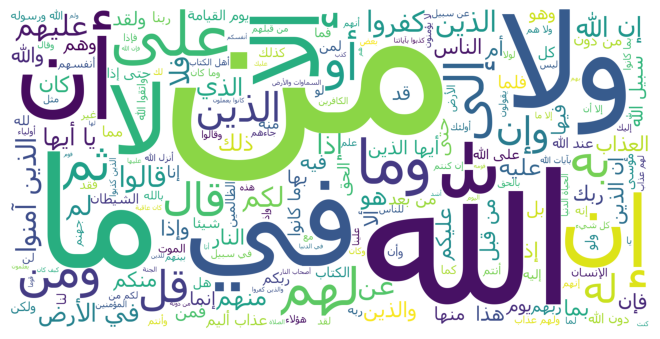

In [57]:
  # Build the Arabic word cloud
  wordc = WordCloud(font_path='tahoma',background_color='white',width=2000,height=1000).generate(artext)
  # Draw the word cloud
  plt.imshow(wordc)
  plt.axis("off")
  plt.tight_layout(pad = 0)
    
  plt.show()

(-0.5, 1999.5, 999.5, -0.5)

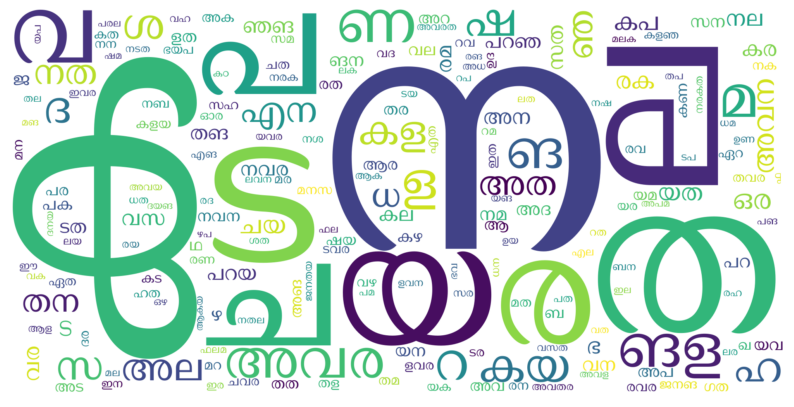

In [77]:
neg_malayalam =  list(neg['MalayalamText'])
neg_malayalam = ' '.join(neg_malayalam)

#Creating word cloud for the negative words (Sanskrit)
font = 'C:/Programming Practice Notebooks/religious-texts-NLP/font/malayalam.ttf'
from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(font_path=font, collocations=False,background_color="white",width=2000,height=1000)
wc.generate(neg_malayalam)
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

### Positive sentiment

In [71]:
pos = df.loc[df['Sentiment Analysis'] == 'POSITIVE']
pos

,JuzNameArabic,SurahNo,OrignalArabicText,EnglishTranslation,UrduText,MalayalamText,Sentiment Analysis
0,الم,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,"In the name of Allah, Most Gracious, Most Merc...",شروع الله کا نام لے کر جو بڑا مہربان نہایت رحم...,പരമകാരുണികനും കരുണാനിധിയുമായ അല്ലാഹുവിന്റെ നാമ...,POSITIVE
1,الم,1,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,"Praise be to Allah, the Cherisher and Sustaine...",سب طرح کی تعریف خدا ہی کو (سزاوار) ہے جو تمام ...,സ്തുതി സര്‍വ്വലോക പരിപാലകനായ അല്ലാഹുവിന്നാകുന്നു.,POSITIVE
2,الم,1,الرَّحْمَٰنِ الرَّحِيمِ,"Most Gracious, Most Merciful;",بڑا مہربان نہایت رحم والا,പരമകാരുണികനും കരുണാനിധിയും.,POSITIVE
3,الم,1,مَالِكِ يَوْمِ الدِّينِ,Master of the Day of Judgment.,انصاف کے دن کا حاکم,പ്രതിഫല ദിവസത്തിന്റെ ഉടമസ്ഥന്‍.,POSITIVE
4,الم,1,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,"Thee do we worship, and Thine aid we seek.",(اے پروردگار) ہم تیری ہی عبادت کرتے ہیں اور تج...,നിന്നെ മാത്രം ഞങ്ങള്‍ ആരാധിക്കുന്നു. നിന്നോട്‌...,POSITIVE
...,...,...,...,...,...,...,...
6230,عَمَّ يَتَسَاءَلُونَ,114,قُلْ أَعُوذُ بِرَبِّ النَّاسِ,Say: I seek refuge with the Lord and Cherisher...,کہو کہ میں لوگوں کے پروردگار کی پناہ مانگتا ہوں,പറയുക: മനുഷ്യരുടെ രക്ഷിതാവിനോട്‌ ഞാന്‍ ശരണം തേ...,POSITIVE
6231,عَمَّ يَتَسَاءَلُونَ,114,مَلِكِ النَّاسِ,"The King (or Ruler) of Mankind,",(یعنی) لوگوں کے حقیقی بادشاہ کی,മനുഷ്യരുടെ രാജാവിനോട്‌.,POSITIVE
6232,عَمَّ يَتَسَاءَلُونَ,114,إِلَٰهِ النَّاسِ,"The god (or judge) of Mankind,-",لوگوں کے معبود برحق کی,മനുഷ്യരുടെ ദൈവത്തോട്‌.,POSITIVE
6234,عَمَّ يَتَسَاءَلُونَ,114,الَّذِي يُوَسْوِسُ فِي صُدُورِ النَّاسِ,(The same) who whispers into the hearts of Man...,جو لوگوں کے دلوں میں وسوسے ڈالتا ہے,മനുഷ്യരുടെ ഹൃദയങ്ങളില്‍ ദുര്‍ബോധനം നടത്തുന്നവര്‍.,POSITIVE


(-0.5, 1999.5, 999.5, -0.5)

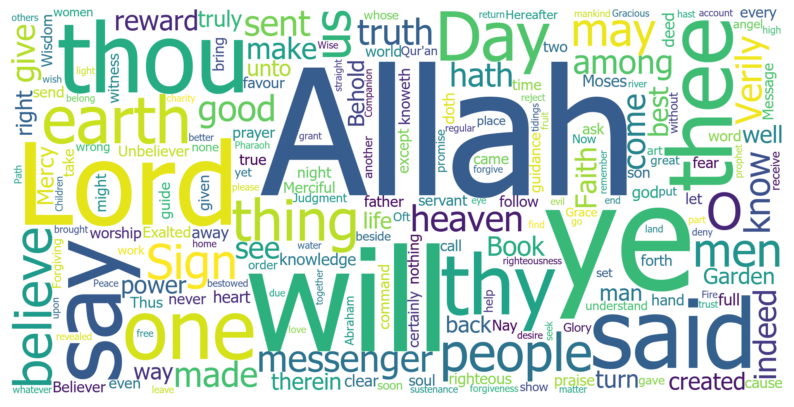

In [63]:
#Creating word cloud for the positive words

from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(collocations=False,background_color="white", font_path='tahoma',width=2000,height=1000)
wc.generate(' '.join(pos.EnglishTranslation))
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [64]:
## Arabic texts to a list of words

pos_arabic =  list(pos['OrignalArabicText'])
full_string = ' '.join(pos_arabic)
reshaped_text = arabic_reshaper.reshape(full_string)
artext = get_display(reshaped_text)
artext

'ﺱﺎﻨﻟﺍﻭ ﺔﻨﺠﻟﺍ ﻦﻣ ﺱﺎﻨﻟﺍ ﺭﻭﺪﺻ ﻲﻓ ﺱﻮﺳﻮﻳ ﻱﺬﻟﺍ ﺱﺎﻨﻟﺍ ﻪﻟﺇ ﺱﺎﻨﻟﺍ ﻚﻠﻣ ﺱﺎﻨﻟﺍ ﺏﺮﺑ ﺫﻮﻋﺃ ﻞﻗ ﻖﻠﻔﻟﺍ ﺏﺮﺑ ﺫﻮﻋﺃ ﻞﻗ ﺪﻟﻮﻳ ﻢﻟﻭ ﺪﻠﻳ ﻢﻟ ﺪﻤﺼﻟﺍ ﷲ ﺪﺣﺃ ﷲ ﻮﻫ ﻞﻗ ﺪﺴﻣ ﻦﻣ ﻞﺒﺣ ﺎﻫﺪﻴﺟ ﻲﻓ ﺐﻄﺤﻟﺍ ﺔﻟﺎﻤﺣ ﻪﺗﺃﺮﻣﺍﻭ ﺐﺴﻛ ﺎﻣﻭ ﻪﻟﺎﻣ ﻪﻨﻋ ﻰﻨﻏﺃ ﺎﻣ ﺐﺗﻭ ﺐﻬﻟ ﻲﺑﺃ ﺍﺪﻳ ﺖﺒﺗ ﺎﺑﺍﻮﺗ ﻥﺎﻛ ﻪﻧﺇ  ﻩﺮﻔﻐﺘﺳﺍﻭ ﻚﺑﺭ ﺪﻤﺤﺑ ﺢﺒﺴﻓ ﺎﺟﺍﻮﻓﺃ ﷲ ﻦﻳﺩ ﻲﻓ ﻥﻮﻠﺧﺪﻳ ﺱﺎﻨﻟﺍ ﺖﻳﺃﺭﻭ ﺢﺘﻔﻟﺍﻭ ﷲ ﺮﺼﻧ ﺀﺎﺟ ﺍﺫﺇ ﻦﻳﺩ ﻲﻟﻭ ﻢﻜﻨﻳﺩ ﻢﻜﻟ ﻥﻭﺪﺒﻌﺗ ﺎﻣ ﺪﺒﻋﺃ ﻻ ﻥﻭﺮﻓﺎﻜﻟﺍ ﺎﻬﻳﺃ ﺎﻳ ﻞﻗ ﺮﺤﻧﺍﻭ ﻚﺑﺮﻟ ﻞﺼﻓ ﺮﺛﻮﻜﻟﺍ ﻙﺎﻨﻴﻄﻋﺃ ﺎﻧﺇ ﻥﻭﺀﺍﺮﻳ ﻢﻫ ﻦﻳﺬﻟﺍ ﻦﻴﻜﺴﻤﻟﺍ ﻡﺎﻌﻃ ﻰﻠﻋ ﺾﺤﻳ ﻻﻭ ﻢﻴﺘﻴﻟﺍ ﻉﺪﻳ ﻱﺬﻟﺍ ﻚﻟﺬﻓ ﺖﻴﺒﻟﺍ ﺍﺬﻫ ﺏﺭ ﺍﻭﺪﺒﻌﻴﻠﻓ ﻒﻴﺼﻟﺍﻭ ﺀﺎﺘﺸﻟﺍ ﺔﻠﺣﺭ ﻢﻬﻓﻼﻳﺇ ﺶﻳﺮﻗ ﻑﻼﻳﻹ ﻝﻮﻛﺄﻣ ﻒﺼﻌﻛ ﻢﻬﻠﻌﺠﻓ ﻞﻴﺠﺳ ﻦﻣ ﺓﺭﺎﺠﺤﺑ ﻢﻬﻴﻣﺮﺗ ﻞﻴﺑﺎﺑﺃ ﺍﺮﻴﻃ ﻢﻬﻴﻠﻋ ﻞﺳﺭﺃﻭ ﻞﻴﻠﻀﺗ ﻲﻓ ﻢﻫﺪﻴﻛ ﻞﻌﺠﻳ ﻢﻟﺃ ﻞﻴﻔﻟﺍ ﺏﺎﺤﺻﺄﺑ ﻚﺑﺭ ﻞﻌﻓ ﻒﻴﻛ ﺮﺗ ﻢﻟﺃ ﺓﺩﺪﻤﻣ ﺪﻤﻋ ﻲﻓ ﺓﺪﺻﺆﻣ ﻢﻬﻴﻠﻋ ﺎﻬﻧﺇ ﺓﺪﺌﻓﻷﺍ ﻰﻠﻋ ﻊﻠﻄﺗ ﻲﺘﻟﺍ ﺔﻤﻄﺤﻟﺍ ﺎﻣ ﻙﺍﺭﺩﺃ ﺎﻣﻭ ﺔﻤﻄﺤﻟﺍ ﻲﻓ ﻥﺬﺒﻨﻴﻟ  ﻼﻛ ﻩﺪﻠﺧﺃ ﻪﻟﺎﻣ ﻥﺃ ﺐﺴﺤﻳ ﻩﺩﺪﻋﻭ ﻻﺎﻣ ﻊﻤﺟ ﻱﺬﻟﺍ ﺮﺒﺼﻟﺎﺑ ﺍﻮﺻﺍﻮﺗﻭ ﻖﺤﻟﺎﺑ ﺍﻮﺻﺍﻮﺗﻭ ﺕﺎﺤﻟﺎﺼﻟﺍ ﺍﻮﻠﻤﻋﻭ ﺍﻮﻨﻣﺁ ﻦﻳﺬﻟﺍ ﻻﺇ ﺮﺼﻌﻟﺍﻭ ﻢﻴﻌﻨﻟﺍ ﻦﻋ ﺬﺌﻣﻮﻳ ﻦﻟﺄﺴﺘﻟ ﻢﺛ ﻦﻴﻘﻴﻟﺍ ﻦﻴﻋ ﺎﻬﻧﻭﺮﺘﻟ ﻢﺛ ﻢﻴﺤﺠﻟﺍ ﻥﻭﺮﺘﻟ ﻦﻴﻘﻴﻟﺍ ﻢﻠﻋ ﻥﻮﻤﻠﻌﺗ ﻮﻟ ﻼﻛ ﻥﻮﻤﻠﻌﺗ ﻑﻮﺳ ﻼﻛ ﻢﺛ ﻥﻮﻤﻠﻌﺗ ﻑﻮﺳ ﻼﻛ ﺮﺛﺎﻜﺘﻟﺍ ﻢﻛﺎﻬﻟﺃ ﻪﻴﻫ ﺎﻣ ﻙﺍﺭﺩﺃ ﺎﻣﻭ ﺔﻳﻭﺎﻫ ﻪﻣﺄﻓ ﻪﻨﻳ

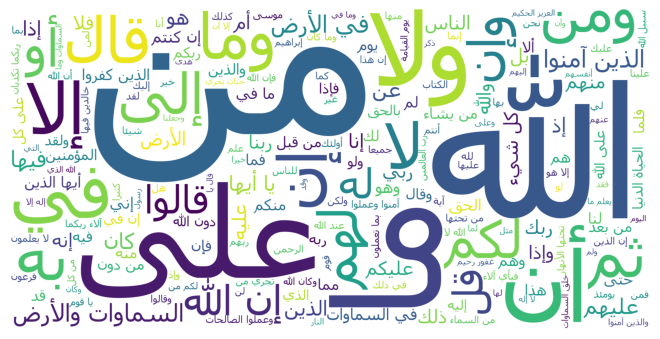

In [65]:
  # Build the Arabic word cloud
  wordc = WordCloud(font_path='tahoma',background_color='white',width=2000,height=1000).generate(artext)
  # Draw the word cloud
  plt.imshow(wordc)
  plt.axis("off")
  plt.tight_layout(pad = 0)
    
  plt.show()

(-0.5, 1999.5, 999.5, -0.5)

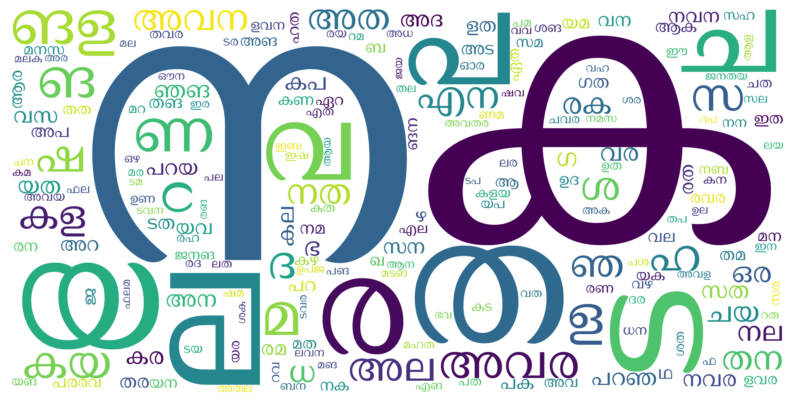

In [78]:
pos_malayalam =  list(pos['MalayalamText'])
pos_malayalam = ' '.join(pos_malayalam)

#Creating word cloud for the negative words (Sanskrit)
font = 'C:/Programming Practice Notebooks/religious-texts-NLP/font/malayalam.ttf'
from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(font_path=font, collocations=False,background_color="white",width=2000,height=1000)
wc.generate(pos_malayalam)
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")